In [ ]:
pip install xlrd

In [ ]:
pip install openpyxl

In [ ]:
pip install seaborn

In [4]:
import pandas as pd
import numpy as np 

In [5]:
df=pd.read_excel('dataset.xlsx',
                 sheet_name='Hoja5',
                 engine = 'openpyxl',
                )

In [6]:
df.drop(['Pruebas'],
        axis=1,
        inplace=True)

In [7]:
df.rename(columns = {'Edo.': 'Estado',
                     'Habs': 'Habitantes',
                     'Cont14dias':'Contagios las últimas dos semanas',
                     'Muertes15dias':'Defunciones las últimas dos semanas',
                     'ContTotales':'Contagios Acumulados',
                     'MuertesTotales': 'Defunciones Acumuladas'},
          inplace=True
         )

In [8]:
df.head(33)

,Estado,Habitantes,Contagios las últimas dos semanas,Defunciones las últimas dos semanas,Contagios Acumulados,Defunciones Acumuladas
0,Durango,1632934,234,14,67564,3481
1,Quintana Roo,1325578,305,13,90999,4321
2,Chiapas,4796580,389,27,33617,2384
3,Morelos,1777227,482,30,65844,5162
4,Coahuila de Zaragoza,2748391,528,43,143460,8700
5,Campeche,822441,552,21,33309,2220
6,Zacatecas,1490668,666,19,67067,3827
7,Baja California,3155070,676,73,129391,12095
8,Yucatán,1955577,736,21,108277,6368
9,Guerrero,3388768,743,39,97186,6666


# 1. Description of the data.
#### En la tabla anterior se muestra la propagación del COVID-19 en México a través de datos y visualizaciones actualizadas frecuentemente

# 2. Describe Variables
* `Estado` - Variable de tipo String, que muestra el Estado de la Republica del que se mostraran los datos.
* `Habitantes:` - Cantidad total de habitantes de dicho estado segun INEGI, hasta el año 2020. 
* `Contagios las últimas dos semanas:`- Por medio de una variable String, se muestran los contagios de COVID19 en los últimos 14 días.
* `Defunciones las últimas dos semanas`- Esta columna representa los fallecimientos que se han presentado en los últimos 14 días.
* `Contagios Acumulados`- Podemos observar el total de casos SARS COVID 19 desde el inicio de la pandemia en el estado correspondiente.
* `Defunciones Acumuladas`- Total de fallecimientos hasta el día de hoy desde Marzo 2019.

# 3. Questions

## Pregunta #1: Como se puede observar la distribución de casos totales en Nuevo Leon desde el inicio de la pandemia comparado con los de Sinaloa?

In [9]:
df.set_index('Estado', inplace=True)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
mpl.style.use('tableau-colorblind10')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


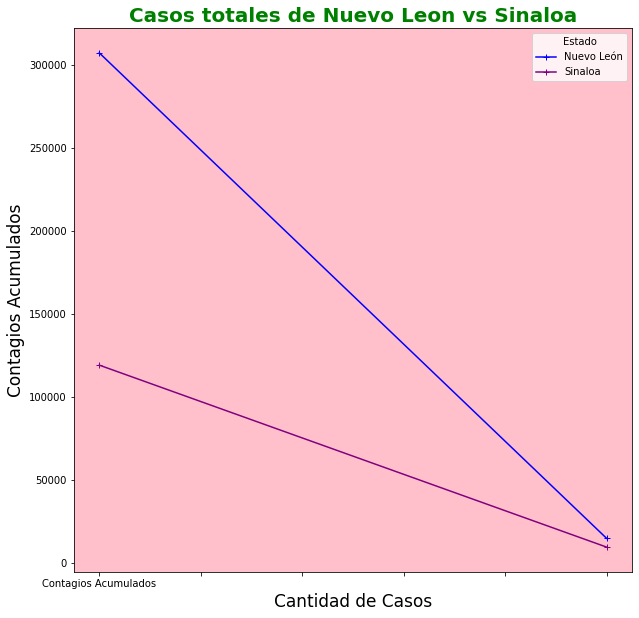

In [12]:
ci=df.loc[['Nuevo León','Sinaloa'],'Contagios Acumulados':].transpose()
ci.plot(marker= '+',color=['blue','purple'],figsize=(10,10))
plt.xlabel('Cantidad de Casos', fontsize=17)
plt.ylabel('Contagios Acumulados', fontsize=17)
plt.title('Casos totales de Nuevo Leon vs Sinaloa', fontsize=20,fontweight='bold',color='Green')
ax = plt.axes()
ax.set_facecolor("pink")
plt.show()

### Conclusión pregunta 1. :
#### Podemos observar claramente que los casos del Estado de Nuevo León son superiores a los de Sinaloa por bastante. Esto mismo nos lleva a la 2da pregunta:

## Pregunta #2: Que diferencia hay entre la población de Nuevo León y de Sinaloa?

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


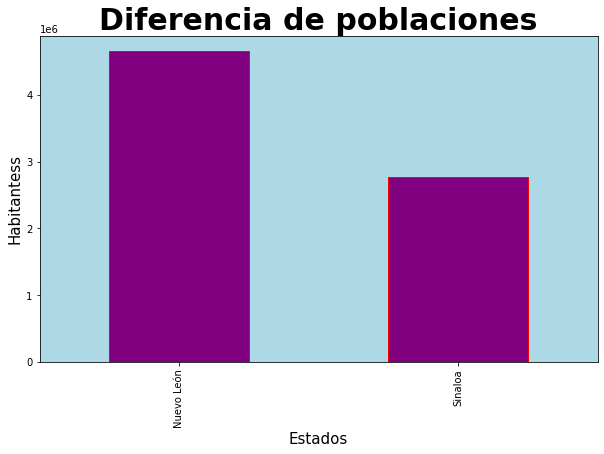

In [13]:
df['Habitantes'].loc(axis=0)['Nuevo León','Sinaloa'].plot(kind='bar',color='Purple',edgecolor='red',figsize=(10,6))
plt.title("Diferencia de poblaciones", fontweight='bold',size=30)
plt.xlabel("Estados", size=15)
plt.ylabel("Habitantess", size=15)
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.show()

### Conclusión pregunta 2. :
#### La población de Nuevo Leon es mucho mayor que la población de Sinaloa, por ello podemos entender el porque hay mayor numero de casos en Nuevo Leon

## Pregunta #3: Cual es el promedio de las defunciones de todos los estados de Mexico?

In [14]:
myPivot=pd.pivot_table(df,
                       index=['Estado'],
                       values=['Defunciones Acumuladas'],
                       aggfunc=['mean'],
                       margins=True,
                      )
a=myPivot.iloc[-1:,:]
a

,mean
,Defunciones Acumuladas
Estado,
All,18472


### Conclusión pregunta 3. :
#### Este numero de 18,472 personas fallecidas nos puede servir como indicador de que tan bueno o malo fue el manejo de la pandemia en nuestro Pais.

## Pregunta #4: ¿Que estado ha tenido mas defunciones y con que porcentaje del total?

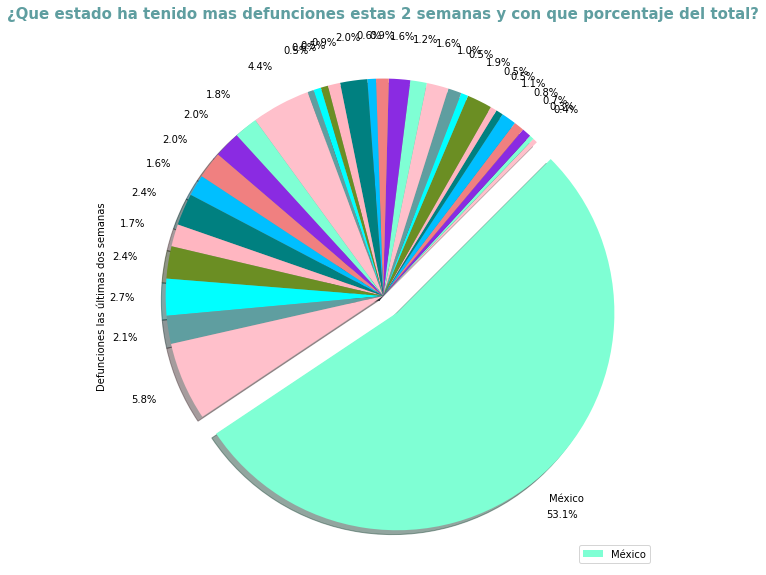

In [15]:
df['Defunciones las últimas dos semanas'].plot(kind='pie', 
                                             figsize=(10,10),
                                             pctdistance = 1.2,
                                             autopct='%1.1f%%',
                                             shadow = True,
                                             startangle = 45,
                                             colors = ["pink","aquamarine","blueviolet","lightcoral","deepskyblue","teal","lightpink","olivedrab","cyan","cadetblue"],
                                             labels=['','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','México'],
                                            explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.1])
plt.title('¿Que estado ha tenido mas defunciones estas 2 semanas y con que porcentaje del total?',fontsize =15, fontweight='bold',color = 'cadetblue')
plt.legend(loc="lower right")

### Conclusión pregunta 4. :
#### Como se observa claramente en la grafica, más de la mitad de las defunciones estas dos semanas han sido en México. La respuesta a nuestra pregunta fuera: En México, con el 53.1% de los fallecimientos en las últimas dos semanas

## Pregunta #5: Como se catalogarian los estados segun su riesgo de contagio estas ultimas dos semanas?

In [16]:
def custom_cls(x):
  if (0<= x<= 500):
    return 'Riesgo bajo'
  elif (501<= x<= 900):
    return 'Riesgo medio'
  elif (901<= x<=1500):
    return 'Riesgo alto'
  else:
    return 'Riesgo muy alto'

In [17]:
df['Riesgo Actual'] = df.apply(lambda tbl: custom_cls(tbl['Contagios las últimas dos semanas']),
                       axis= 1)

In [18]:
riesgo_actual = df.groupby(['Estado','Riesgo Actual']).size()
riesgo_actual = riesgo_actual.to_frame()

In [19]:
riesgo_actual= riesgo_actual.reset_index()
df=riesgo_actual
riesgo_actual.drop([0], axis =1, inplace= True)
riesgo_actual

,Estado,Riesgo Actual
0,Aguascalientes,Riesgo alto
1,Baja California,Riesgo medio
2,Baja California Sur,Riesgo alto
3,Campeche,Riesgo medio
4,Chiapas,Riesgo bajo
5,Chihuahua,Riesgo alto
6,Ciudad de México,Riesgo muy alto
7,Coahuila de Zaragoza,Riesgo medio
8,Colima,Riesgo alto
9,Durango,Riesgo bajo


### Conclusión pregunta 5. :
#### Como se observa claramente en la grafica, más de la mitad de los casos son en México. La respuesta a nuestra pregunta fuera: En México, con el 52.6% de los contagios en las últimas dos semanas

## Pregunta #6: Como catalogariamos el manejo actual de la pandemia?

In [20]:
import seaborn as sns

In [21]:
plot_order = ['Riesgo bajo','Riesgo medio','Riesgo alto','Riesgo muy alto']

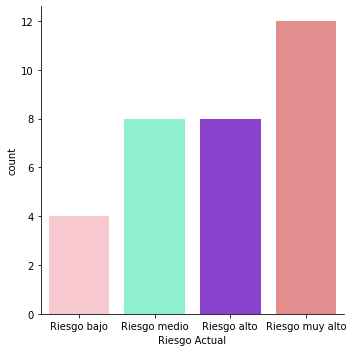

In [23]:
g = sns.catplot(x = 'Riesgo Actual',
                kind= 'count',
                palette=["pink","aquamarine","blueviolet","lightcoral"],
                data= df,
                order= plot_order)

### Conclusión pregunta 6. :
#### Desaforunadamente 12 estados estan catalogados como "Riesgo muy alto", teniendo mas de 1500 casos en los ultimos 14 dias